# Clasificación de calidad de vinos con Random Forest

### Explicación

En este notebook se intenta predecir que tan bueno será un vino según sus características.

### variables

1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
12 - quality (score between 0 and 10) 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/work/WineQT.csv')

# Exploración dataset

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

# Limpieza de datos

## Eliminación de columnas innecesarias

In [6]:
df = df.drop('Id',axis=1)

## Limpieza outliers

In [7]:
df = df[df['sulphates']<=1.50]
df = df[df['total sulfur dioxide']<=170]
df = df[df['free sulfur dioxide']<=60]
df = df[df['chlorides']<=0.5]
df = df[df['residual sugar']<=10]

## Modificando el Target

In [8]:
df['quality'] = df['quality'].replace([[3,4,5],[6,7,8]],(0,1))
#0 vinos con mal puntaje
#1 vinos con buen puntaje

In [9]:
df.shape

(1125, 12)

## Análisis exploratorio de datos

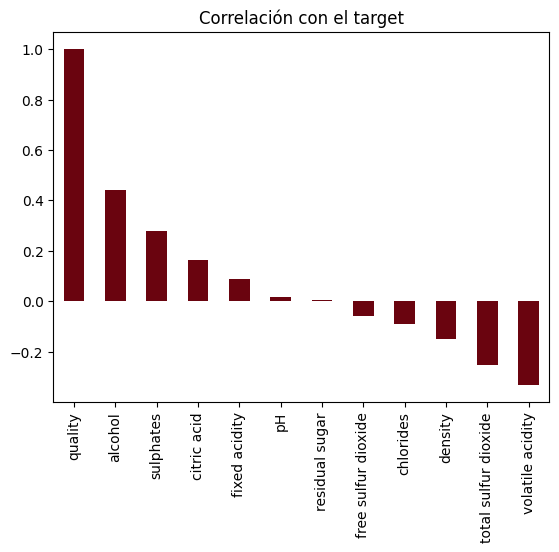

In [10]:
df.corr()['quality'].sort_values(ascending=False).plot(kind='bar',color='#6a040f')
plt.title('Correlación con el target')
plt.show()

## ¿Qué características tienen los vinos con mayor calificación?

In [11]:
df_quality = df[df['quality']==1]
df_less_quality = df[df['quality']==0]

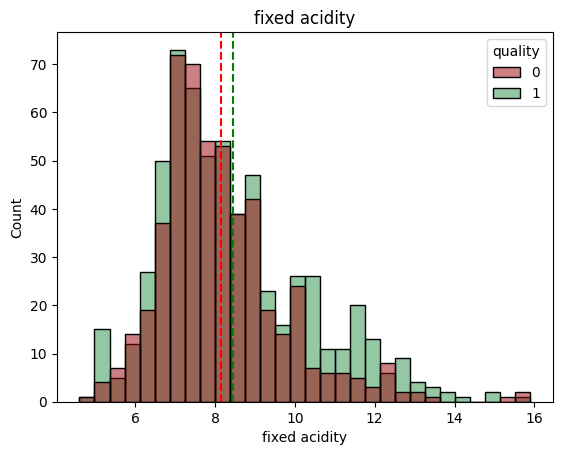

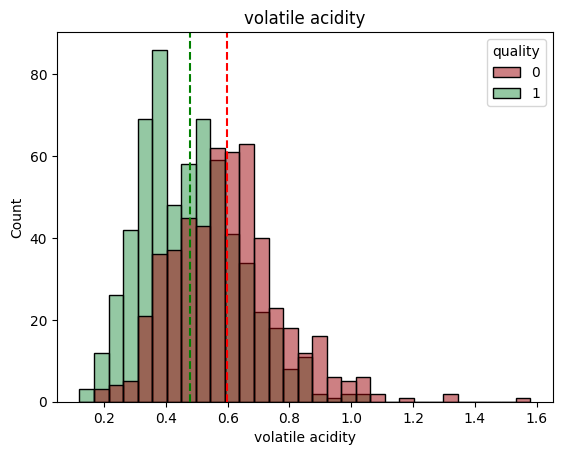

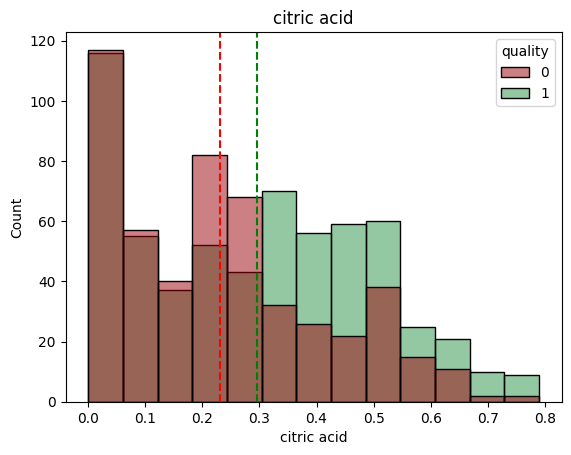

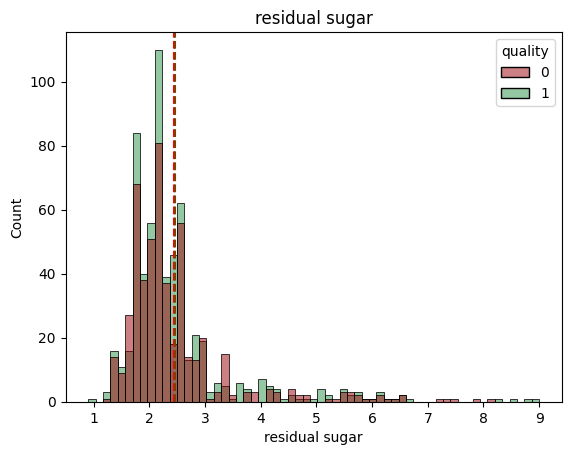

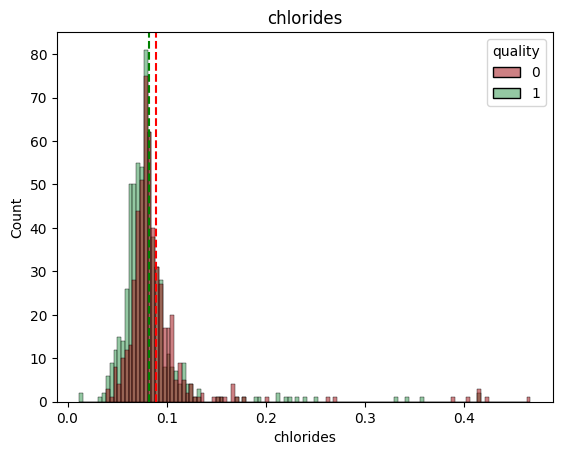

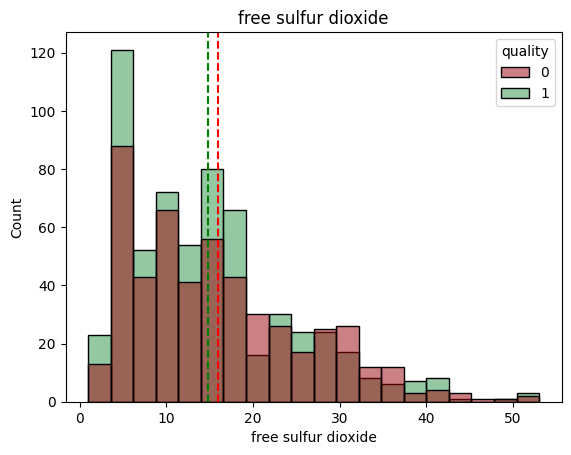

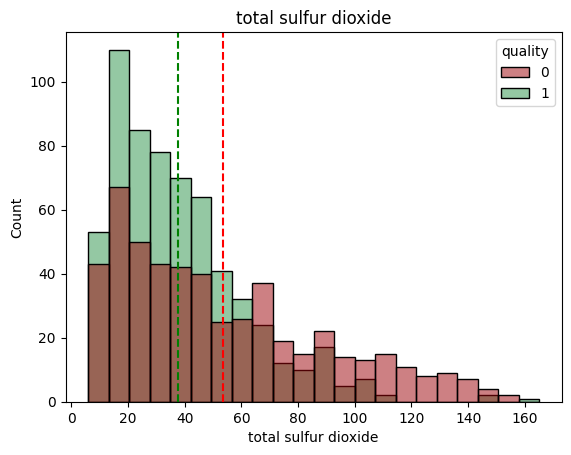

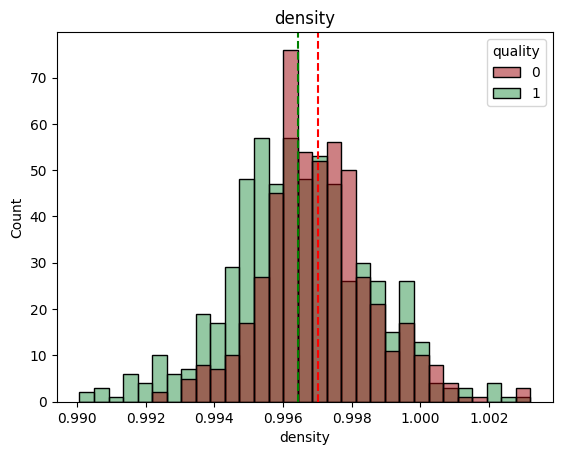

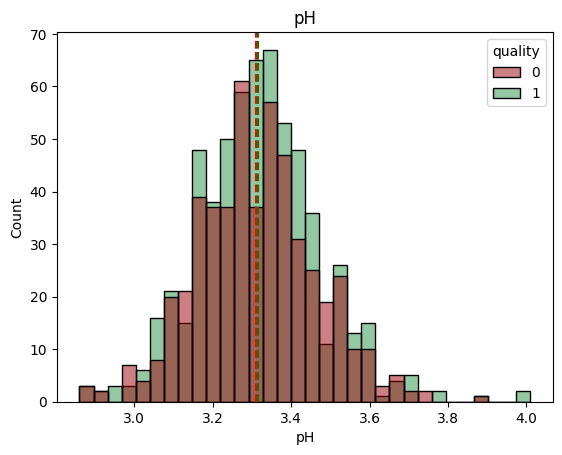

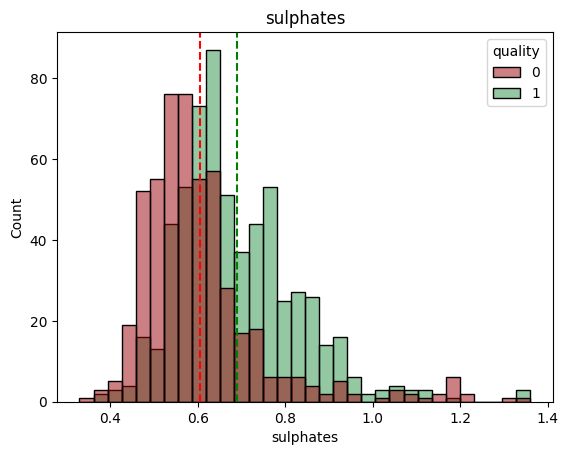

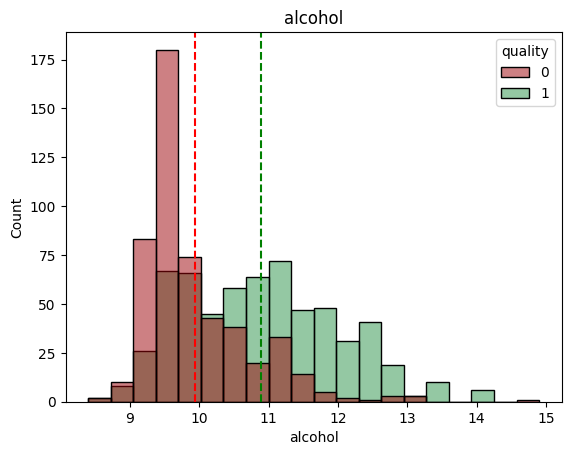

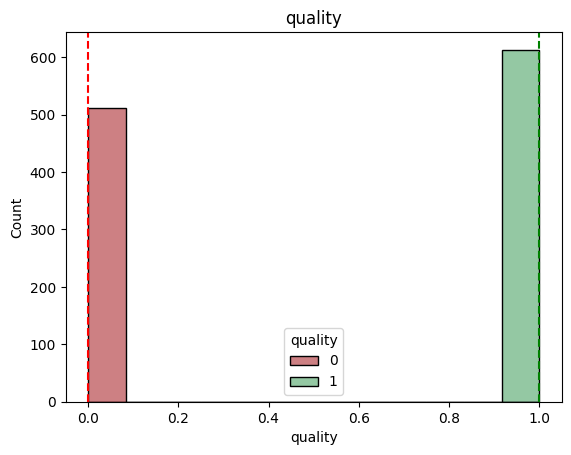

In [12]:
quality_color = ['#9d0208','#2b9348']
for features in df.columns:
    sns.histplot(data=df,x=features,palette=quality_color,hue='quality')
    plt.axvline(x=df_quality[features].mean(),color='green',linestyle='dashed')
    plt.axvline(x=df_less_quality[features].mean(),color='red',linestyle='dashed')
    plt.title(features)
    plt.show()

### Importantes

- Vemos que la cantidad de alcohol en los vinos tiene una diferente distribución en vinos con mayor calidad, tendiendo a un promedio de 10,8.

- Los sulfatos también tienen a tener mayor cantidades en los vinos con mejor calidad.

# Random Forest para clasificación

In [13]:
#separación de datos
x = df.drop('quality',axis=1)
y = df.quality

In [14]:
#importacion train y test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


## Primer modelo

In [15]:
#creación modelo
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10,max_depth=2,random_state=42)


In [16]:
#entrenamiento
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)

In [17]:
#calculando predicciones
prediccion_con_train = model.predict(x_train)
prediccion_con_test = model.predict(x_test)

In [18]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train,prediccion_con_train)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test,prediccion_con_test)
print(f'accuracy de train: {train_accuracy}')
print(f'accuracy de test: {test_accuracy}')

accuracy de train: 0.7560355781448539
accuracy de test: 0.757396449704142


### Nota

Vemos que el modelo tuvo un accuracy un poco bajo, veamos si podemos mejorarlo

## ¿Qué columnas son más importantes para nuestro modelo?

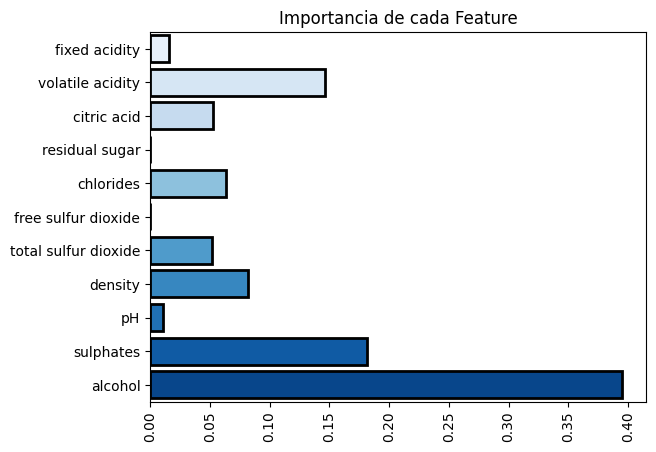

In [19]:
importances = model.feature_importances_
columns = x.columns

sns.barplot(x=importances,y=columns, palette = 'Blues', saturation = 2.0, edgecolor = 'black', linewidth = 2)
plt.title('Importancia de cada Feature')
plt.xticks(rotation=90)
plt.show()

## Creación de segundo modelo

En este modelo se usarán solo las columnas con mayor relevancia 

In [20]:
important_cols = ['alcohol','sulphates','density', 'total sulfur dioxide','volatile acidity']

x2 = df[important_cols]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x2,y,test_size=0.3,random_state=42)

In [22]:
#creacion modelo
model2 = RandomForestClassifier(n_estimators=10,max_depth=2,random_state=42)

In [23]:
#entrenamiento
model2.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)

In [24]:
#calculando predicciones
prediccion2_con_train = model2.predict(x_train)
prediccion2_con_test = model2.predict(x_test)

In [25]:
#Calculo de metricas 2

#Calculo el accuracy en Train
train_accuracy2 = accuracy_score(y_train,prediccion2_con_train)

#Calculo el accuracy en Test
test_accuracy2 = accuracy_score(y_test,prediccion2_con_test)
print(f'accuracy de train: {train_accuracy2}')
print(f'accuracy de test: {test_accuracy2}')

accuracy de train: 0.7636594663278272
accuracy de test: 0.7633136094674556


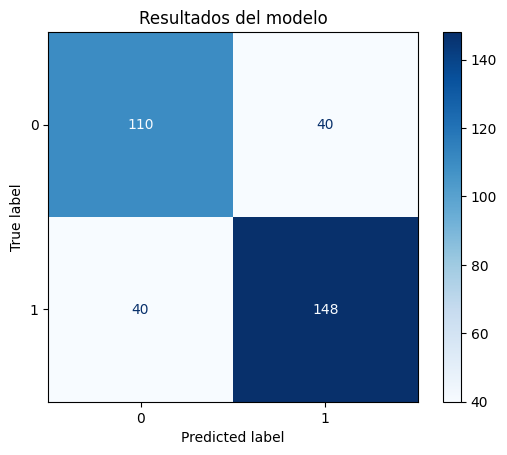

In [26]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,prediccion2_con_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model2.classes_)
disp.plot(cmap='Blues')
plt.title('Resultados del modelo')
plt.show()

# Conclusiones

- El modelo tiene un accuracy del 0.76 %

- El modelo tuvo en total 258 aciertos y 80 fallos

- Las variables más importantes al momento de predecir la calidad de un vino son: el alcohol, los sulfatos, la densidad, el dioxido de sulfuro y el ácido volatil.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8ab342ce-1eac-4090-a6b0-184fb1e55b94' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>